In [16]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import openweathermapy.core as owm
from citipy import citipy
import requests
import seaborn as sns
from datetime import datetime

# Import API key
from api_keys import api_key

In [17]:
# Generate list of random cities
# The "n" determines how many cities we generate
# Initialize our lists to track the cities
# I chose 700 because many cities will not have data available
# n=700 to get above the 500 city threshold
n = 700
cities = []
country_codes = []

for x in range(n):
    lat = np.random.uniform(-90, 90)
    lng = np.random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lng)
    
    # Make sure that the randomly generated city is not already in our series
    # If it is, regenerate the lat and lng until we get one that isn't
    while city.city_name in cities:
        lat = np.random.uniform(-90, 90)
        lng = np.random.uniform(-180, 180)
        city = citipy.nearest_city(lat, lng)
    
    # Add the data to our lists
    cities.append(city.city_name)
    country_codes.append(city.country_code)
    
country_codes = [x.upper() for x in country_codes]

In [18]:
# Perform Weather Check Using API Calls
# Create base URL and indicate imperial units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "standard"

In [19]:
# Build partial query URL
query = f"{url}appid={api_key}&units={units}&q="

In [20]:
# Create an "extracts" object to get the temperature, humidity, cloudiness and wind speed
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []

for x in range(len(cities)):
    response = requests.get(f"{query}{cities[x]},{country_codes[x].upper()}").json()
    
    # Some of the cities we generate don't have data in openweathermap, so set their values to numpy's NaN
    try:
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
    
    # Sometimes it's not cloudy! Then 'clouds' does not exist, so set it to zero.
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append(0)
        
    # Print each city name and query string    
    print(f"Processing record {x + 1} | {cities[x]}")
    print(f"{query}{cities[x]},{country_codes[x].upper()}")

print("--------------------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")

# Assemble data frame
weather_df = pd.DataFrame({"City": cities,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Humidity": humidity,
                           "Max Temp": temperature,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Date": dates,
                           "Country": country_codes
                          })

Processing record 1 | puerto rico
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=puerto rico,CO
Processing record 2 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=jamestown,SH
Processing record 3 | shingu
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=shingu,JP
Processing record 4 | odweyne
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=odweyne,SO
Processing record 5 | albany
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=albany,AU
Processing record 6 | saint george
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=saint george,BM
Processing record 7 | prainha
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&un

Processing record 57 | yamada
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=yamada,JP
Processing record 58 | gasa
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=gasa,BT
Processing record 59 | sesheke
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=sesheke,ZM
Processing record 60 | amapa
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=amapa,BR
Processing record 61 | taoudenni
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=taoudenni,ML
Processing record 62 | alyangula
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=alyangula,AU
Processing record 63 | norman wells
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standa

Processing record 114 | haines junction
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=haines junction,CA
Processing record 115 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=bluff,NZ
Processing record 116 | scarborough
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=scarborough,TT
Processing record 117 | pimentel
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=pimentel,PE
Processing record 118 | westpunt
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=westpunt,AN
Processing record 119 | amderma
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=amderma,RU
Processing record 120 | anadyr
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a

Processing record 171 | tra vinh
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=tra vinh,VN
Processing record 172 | richards bay
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=richards bay,ZA
Processing record 173 | batagay-alyta
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=batagay-alyta,RU
Processing record 174 | liverpool
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=liverpool,CA
Processing record 175 | faanui
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=faanui,PF
Processing record 176 | balaka
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=balaka,MW
Processing record 177 | mehamn
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a

Processing record 227 | lorengau
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=lorengau,PG
Processing record 228 | grand river south east
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=grand river south east,MU
Processing record 229 | wangdiphodrang
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=wangdiphodrang,BT
Processing record 230 | enid
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=enid,US
Processing record 231 | kyren
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=kyren,RU
Processing record 232 | almaznyy
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=almaznyy,RU
Processing record 233 | totness
http://api.openweathermap.org/data/2.5/weather?appid=2

Processing record 284 | tomari
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=tomari,RU
Processing record 285 | saint anthony
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=saint anthony,CA
Processing record 286 | kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=kaitangata,NZ
Processing record 287 | kensington
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=kensington,CA
Processing record 288 | naantali
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=naantali,FI
Processing record 289 | padang
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=padang,ID
Processing record 290 | ust-omchug
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd2

Processing record 340 | jiayuguan
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=jiayuguan,CN
Processing record 341 | caronport
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=caronport,CA
Processing record 342 | mazara del vallo
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=mazara del vallo,IT
Processing record 343 | manacapuru
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=manacapuru,BR
Processing record 344 | sur
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=sur,OM
Processing record 345 | bolu
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=bolu,TR
Processing record 346 | mahanoro
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b

Processing record 397 | isla vista
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=isla vista,US
Processing record 398 | tsihombe
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=tsihombe,MG
Processing record 399 | ekpoma
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=ekpoma,NG
Processing record 400 | aasiaat
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=aasiaat,GL
Processing record 401 | tuskegee
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=tuskegee,US
Processing record 402 | crestview
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=crestview,US
Processing record 403 | rawson
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67

Processing record 453 | honiara
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=honiara,SB
Processing record 454 | eureka
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=eureka,US
Processing record 455 | adrar
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=adrar,DZ
Processing record 456 | vaitupu
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=vaitupu,WF
Processing record 457 | rongcheng
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=rongcheng,CN
Processing record 458 | tera
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=tera,NE
Processing record 459 | ruteng
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&

Processing record 510 | torbay
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=torbay,CA
Processing record 511 | turukhansk
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=turukhansk,RU
Processing record 512 | dongsheng
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=dongsheng,CN
Processing record 513 | tazmalt
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=tazmalt,DZ
Processing record 514 | posse
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=posse,BR
Processing record 515 | san quintin
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=san quintin,MX
Processing record 516 | viedma
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67

Processing record 565 | upata
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=upata,VE
Processing record 566 | hovd
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=hovd,MN
Processing record 567 | limin khersonisou
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=limin khersonisou,GR
Processing record 568 | terney
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=terney,RU
Processing record 569 | bulolo
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=bulolo,PG
Processing record 570 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=palabuhanratu,ID
Processing record 571 | alofi
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1de

Processing record 621 | vikhorevka
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=vikhorevka,RU
Processing record 622 | wainwright
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=wainwright,CA
Processing record 623 | jacmel
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=jacmel,HT
Processing record 624 | salinopolis
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=salinopolis,BR
Processing record 625 | saint-francois
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=saint-francois,GP
Processing record 626 | anloga
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=anloga,GH
Processing record 627 | linxi
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23

Processing record 677 | grindavik
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=grindavik,IS
Processing record 678 | kelowna
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=kelowna,CA
Processing record 679 | chara
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=chara,RU
Processing record 680 | chagda
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=chagda,RU
Processing record 681 | teguise
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=teguise,ES
Processing record 682 | bokspits
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&units=standard&q=bokspits,BW
Processing record 683 | tolaga bay
http://api.openweathermap.org/data/2.5/weather?appid=2ba33a39b23cd24a464b1decfa67420d&uni

In [14]:
# Remove any cities that have NaN values
weather_df = weather_df.dropna(how='any')

print(f"The data frame contains {len(weather_df['City'])} unique cities.")

The data frame contains 526 unique cities.


In [15]:
weather_df.head()

,City,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed,Date,Country
0,ahome,25.92,-109.18,88.0,301.480,90,8.20,1.567705e+09,MX
1,mawlaik,23.63,94.42,96.0,295.883,98,0.98,1.567705e+09,MM
2,sitka,37.17,-99.65,32.0,307.590,0,4.02,1.567705e+09,US
3,portland,-33.35,149.98,85.0,282.590,38,1.34,1.567705e+09,AU
4,rikitea,-23.12,-134.97,78.0,294.183,80,7.21,1.567705e+09,PF


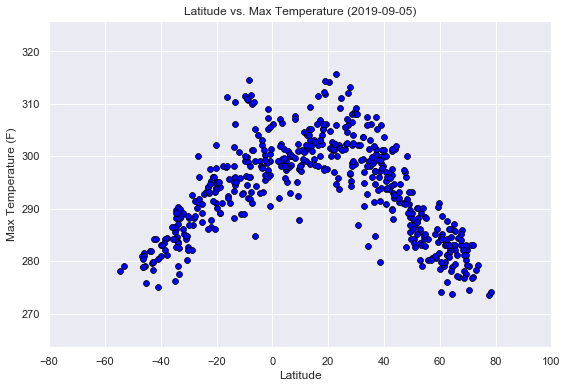

In [8]:
# Latitude vs. Max Temperature
# Using Seaborn
sns.set()

# Increase the size of the graph
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Max Temp'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling

# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Max Temperature ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(min(weather_df['Max Temp']) - 10, max(weather_df['Max Temp']) + 10)


plt.show()

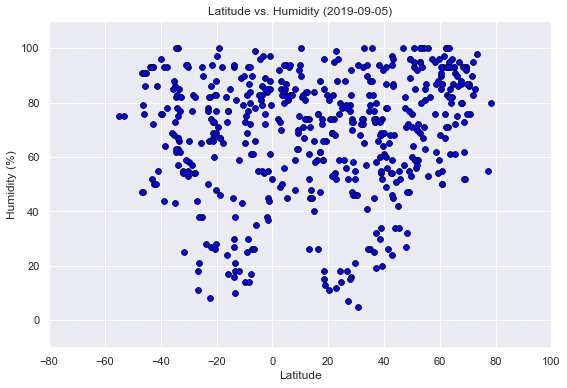

In [9]:
# Latitude vs Humidity
# Using Seaborn
sns.set()

# Increase the size of the graph
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Humidity'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Humidity ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-10, 110)


plt.show()

In [10]:
# Latitude vs. Cloudiness

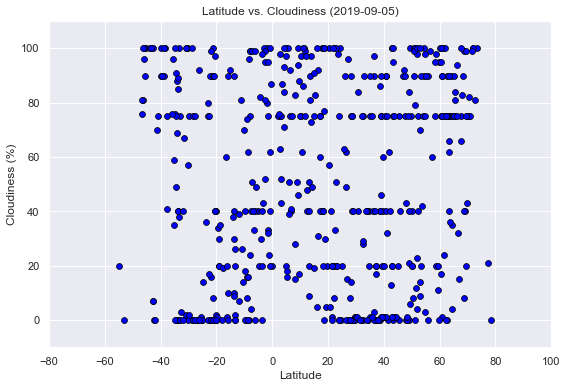

In [11]:
# Using Seaborn
sns.set()

# Increase the size of the graph
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Cloudiness'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Cloudiness ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-10, 110)


plt.show()

In [12]:
# Latitude vs. Wind Speed

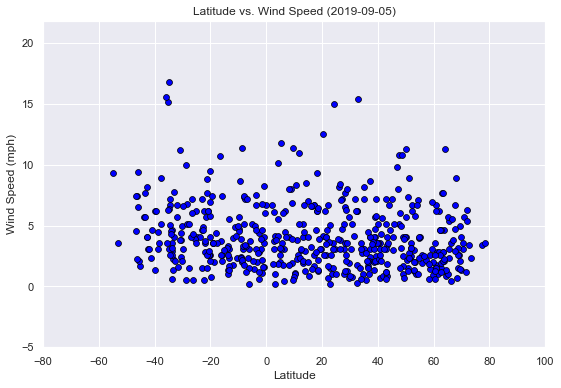

In [13]:
# Using Seaborn
sns.set()

# Increase the size of the graph
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Wind Speed'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling

# Extract date and return it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Wind Speed ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-5, max(weather_df['Wind Speed'])+5)


plt.show()